In [2]:
from som_model import *
from matplotlib import pyplot as plt
import numpy as np
from random import shuffle
import os


In [3]:
# First we test the neuron building block
my_som_neuron = SOMNeuron(20)
print("SOM Neuron weights: ",  my_som_neuron.weights)
print("SOM Neuron weights norm:",  np.linalg.norm(my_som_neuron.weights))
print("SOM Neuron post-activation: ", my_som_neuron.post_activation)


SOM Neuron weights:  [[-0.12264499]
 [ 0.10762625]
 [-0.1059762 ]
 [-0.13237147]
 [ 0.27809391]
 [ 0.4735803 ]
 [ 0.22411402]
 [-0.22078279]
 [-0.12006755]
 [ 0.16527012]
 [-0.11310133]
 [ 0.41436324]
 [-0.13944384]
 [ 0.13244888]
 [-0.29658013]
 [ 0.14804032]
 [-0.12433272]
 [-0.38988777]
 [ 0.04773176]
 [ 0.03468901]]
SOM Neuron weights norm: 1.0
SOM Neuron post-activation:  [[0.]]


In [ ]:
# dimensions 6x6, seed 10 to keep results
rand_seed = 10
np.random.seed(rand_seed) #freeze random number generation initial state
my_som_net = SOMNetwork([6, 6], 3) 
print("Object matrix that stores network neurons: ", my_som_net.neurons) 
print("SOM network dimensions: ", my_som_net.grid_dimensions) 
print("Let's see a single neuron weights: ", my_som_net.neurons[0,0].weights)


Object matrix that stores network neurons:  [[<som_model.SOMNeuron object at 0x7f2ad4f236b0>
SOM network dimensions:  [6, 6]
Let's see a single neuron weights:  [[ 0.61598635]
 [ 0.33088506]
 [-0.71489572]]


In [ ]:
# images list
image_paths = [
    "img/bmp/img1.bmp",
    "img/bmp/img2.bmp"
]


In [ ]:
# vetorized sample accumulator
X_in = []
labels = []

# process images in the list
for path in image_paths:
    print(f"Carregando: {path}")
    img = plt.imread(path)
    print("Shape:", img.shape)

    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            pixel = img[i, j][:3]  # RGB
            norm = np.linalg.norm(pixel)
            if norm == 0: # if the vector is null [0, 0, 0], pass
                continue
            x_in = ((pixel / norm) - 0.5) * 2
            X_in.append(x_in)
            labels.append(path) 

print(f"Total de vetores de entrada: {len(X_in)}")


Carregando: img/bmp/img1.bmp
Shape: (172, 232, 4)
Carregando: img/bmp/img2.bmp
Shape: (209, 231, 4)
Total de vetores de entrada: 88183


In [ ]:
# neighbourhood function
def neighbor_fcn(wnx, wny, x, y, sigma):
    return np.exp(- ((wnx-x)**2 + (wny-y)**2)/(2*sigma**2))

# Test function
print("winning neuron factor: ", neighbor_fcn(1,1,1,1,1))
print("nearby neuron factor: ", neighbor_fcn(1,1,0,1,1))
print("far away neuron factor: ", neighbor_fcn(1,1,9,9,1))


winning neuron factor:  1.0
nearby neuron factor:  0.6065306597126334
far away neuron factor:  1.603810890548638e-28


In [ ]:
# Training
eta = 1.0 # learning rate
sigma = 1.0 # define the area around the winner neuron (BMU) 
n_epochs = 100 
decay_every = 50
decay_factor = 0.8 

data_idx = list(range(len(X_in)))  # shuffle the entry data
for epoch in range(n_epochs):  
    shuffle(data_idx)
    print("Epoch:", epoch)

    if epoch > 0 and (epoch % decay_every == 0): # reduce the learning rate (eta) and the neighbourhood radius (sigma) by 20%
        sigma *= decay_factor
        eta *= decay_factor

    for i in data_idx:
        x_vec = X_in[i].reshape(-1, 1)
        my_som_net.organize(x_vec, eta, neighbor_fcn, sigma) # Finds and updates the weights of the BMU and its neighbors (defined by sigma and neighbor_fcn) with the rate eta.
        if i % 50000 == 0:
            print(i, "/", len(X_in)) # just show the training progress in 50.000 samples processed


Epoch: 0
50000 / 88183
0 / 88183
Epoch: 1
50000 / 88183
0 / 88183
Epoch: 2
0 / 88183
50000 / 88183
Epoch: 3
50000 / 88183
0 / 88183
Epoch: 4
0 / 88183
50000 / 88183
Epoch: 5
0 / 88183
50000 / 88183
Epoch: 6
50000 / 88183
0 / 88183
Epoch: 7
0 / 88183
50000 / 88183
Epoch: 8
50000 / 88183
0 / 88183
Epoch: 9
50000 / 88183
0 / 88183
Epoch: 10
50000 / 88183
0 / 88183
Epoch: 11
0 / 88183
50000 / 88183
Epoch: 12
50000 / 88183
0 / 88183
Epoch: 13
0 / 88183
50000 / 88183
Epoch: 14
0 / 88183
50000 / 88183
Epoch: 15
0 / 88183
50000 / 88183
Epoch: 16
0 / 88183
50000 / 88183
Epoch: 17
50000 / 88183
0 / 88183
Epoch: 18
50000 / 88183
0 / 88183
Epoch: 19
50000 / 88183
0 / 88183
Epoch: 20
50000 / 88183
0 / 88183
Epoch: 21
0 / 88183
50000 / 88183
Epoch: 22
0 / 88183
50000 / 88183
Epoch: 23
0 / 88183
50000 / 88183
Epoch: 24
50000 / 88183
0 / 88183
Epoch: 25
50000 / 88183
0 / 88183
Epoch: 26
50000 / 88183
0 / 88183
Epoch: 27
0 / 88183
50000 / 88183
Epoch: 28
0 / 88183
50000 / 88183
Epoch: 29
0 / 88183
5000

Text(0.5, 1.0, 'Trained neural network grid representation')

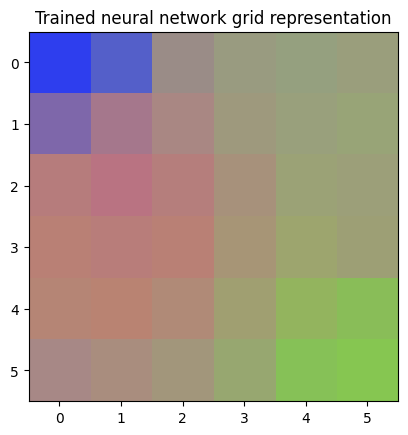

In [16]:
# Image representation after training
nnet_img_repr_trained = np.zeros((my_som_net.grid_dimensions[0], my_som_net.grid_dimensions[1], 3), dtype=np.uint8)
RGBMAX = 255
for i in range(my_som_net.grid_dimensions[0]):
    for j in range(my_som_net.grid_dimensions[1]):
        weight = my_som_net.neurons[i, j].weights.flatten()
        nnet_img_repr_trained[i,j][:] = ((RGBMAX / 2) * (weight + 1)).astype(int)

plt.figure()
plt.imshow(nnet_img_repr_trained)
plt.title("Trained neural network grid representation")


Text(0.5, 1.0, 'Segmented image (last input)')

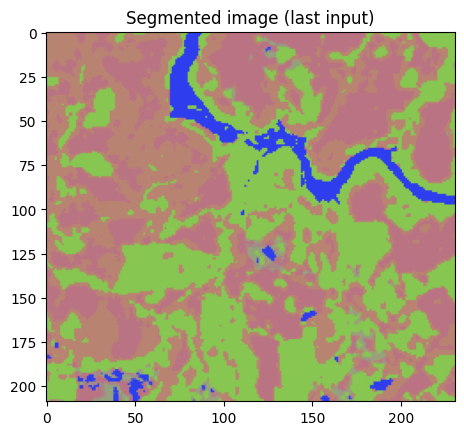

In [ ]:
# Segment of the last image
img = plt.imread(image_paths[-1])  # get the last image for the test
segmented_image = np.zeros((len(img), len(img[0]), 3), dtype=np.uint8) # create the segmented image with the same dimensions of the original image
nn_grid = np.zeros((len(my_som_net.neurons), len(my_som_net.neurons[0]))) # 2D grade (store the similarity between the current pixel and the other neurons)

for i in range(len(img)):
    for j in range(len(img[0])):
        pixel = img[i, j][:3] # run i = line, j = column extracting the RGB
        norm = np.linalg.norm(pixel)
        if norm == 0:
            continue
        x_in = ((pixel / norm) - 0.5) * 2 # normalizes the RGB vector and reescale the interval to [-1,1]
        for k in range(my_som_net.grid_dimensions[0]):
            for l in range(my_som_net.grid_dimensions[1]):
                nn_grid[k,l]= np.dot(x_in.flatten(), my_som_net.neurons[k,l].weights.flatten()) # calculate similarity with scalar product (dot product)

        winning_neuron_max_flat_idx = np.argmax(nn_grid) # finds the winner neuron
        wnx, wny = np.unravel_index(winning_neuron_max_flat_idx, nn_grid.shape) # Get the RGB weights of the winning neuron (they are in [-1, 1])
        weight = my_som_net.neurons[wnx, wny].weights.flatten()
        segmented_image[i,j][:] = ((RGBMAX / 2) * (weight + 1)).astype(int) # Converts back to the range [0, 255]

plt.figure()
plt.imshow(segmented_image)
plt.title("Segmented image (last input)")


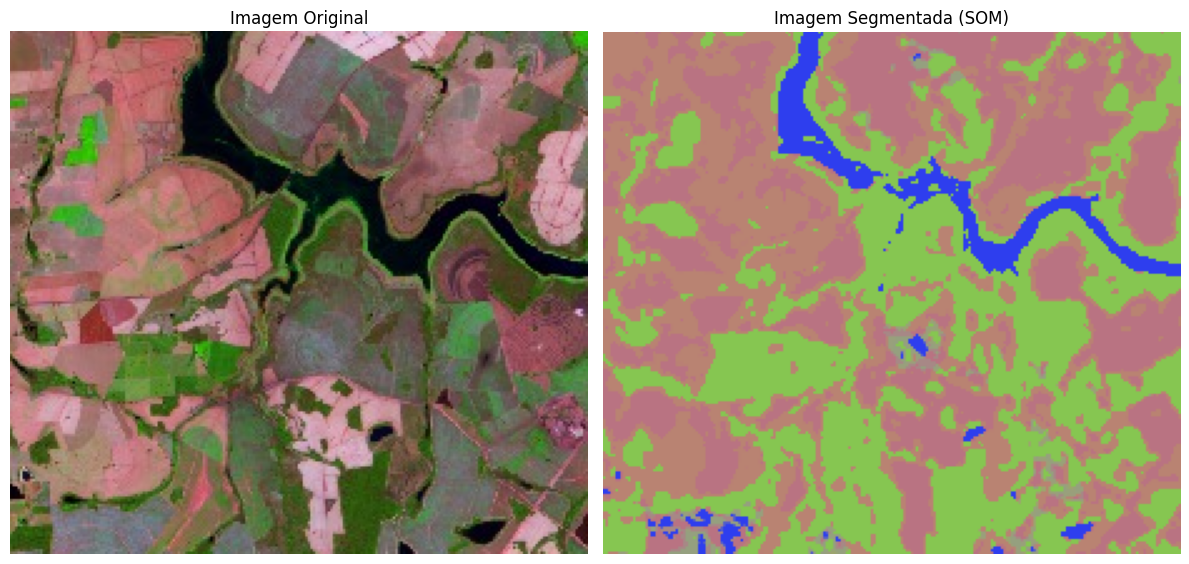

In [ ]:
import matplotlib.pyplot as plt

# original img
img_original = plt.imread(image_paths[-1])

# plot side by side
plt.figure(figsize=(12, 6))

# Original
plt.subplot(1, 2, 1)
plt.imshow(img_original)
plt.title("Original image")
plt.axis('off')

# Segmented
plt.subplot(1, 2, 2)
plt.imshow(segmented_image)
plt.title("Segmented Image (SOM)")
plt.axis('off')

plt.tight_layout()
plt.show()
